Database Path: C:\Users\91940\Documents\Trade_buddy\data\stock_data.db
Connected to the database at C:\Users\91940\Documents\Trade_buddy\data\stock_data.db
             date_time  close_price
0  2024-09-20 09:30:00   230.189896
1  2024-09-20 09:31:00   230.160004
2  2024-09-20 09:32:00   230.410004
3  2024-09-20 09:33:00   230.229996
4  2024-09-20 09:34:00   230.970093


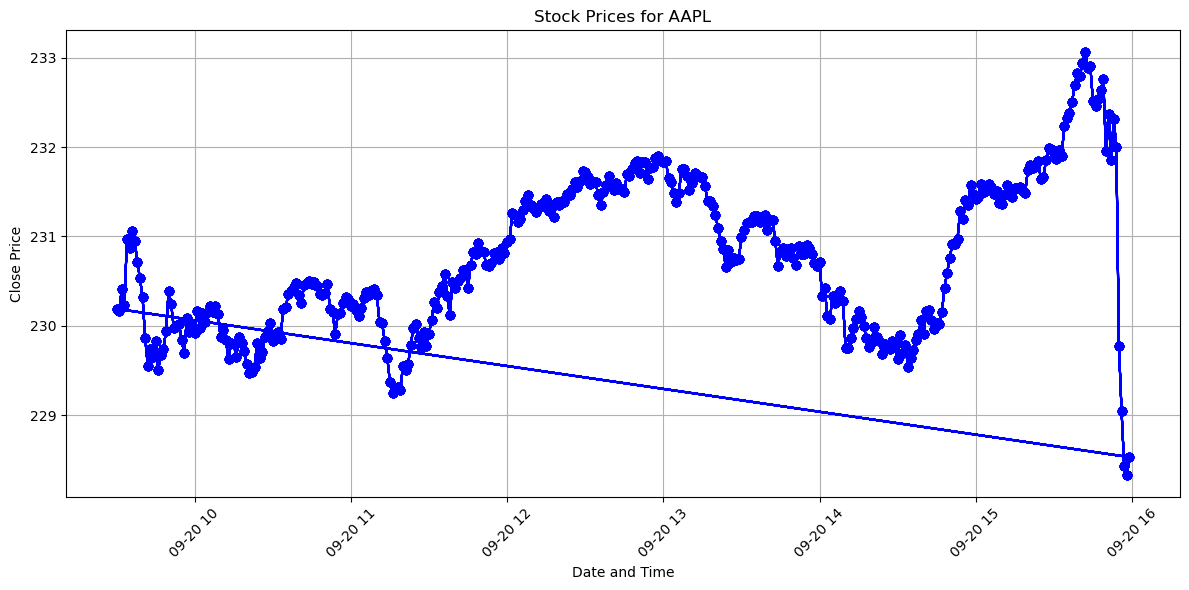

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

# Construct the path to the database
BASE_DIR = r'C:\Users\91940\Documents\Trade_buddy\scripts'
DB_PATH = os.path.join(BASE_DIR, '../data/stock_data.db')

# Normalize the path to handle '..'
DB_PATH = os.path.normpath(DB_PATH)

# Print to confirm the correct path
print("Database Path:", DB_PATH)
SQL_PATH = os.path.join(BASE_DIR, '../models/create_tables.sql')

def create_connection():
    """ Create a database connection to the SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(DB_PATH)
        print(f"Connected to the database at {DB_PATH}")
    except sqlite3.Error as e:
        print(f"Error connecting to the database: {e}")
    return conn

def visualize_stock_data(ticker):
    """ Visualize stock prices from the database """
    conn = create_connection()
    if conn:
        query = f"SELECT date_time, close_price FROM stock_data WHERE ticker='{ticker}'"
        df = pd.read_sql_query(query, conn)
        print(df.head())
        conn.close()


        # Convert date_time to datetime for plotting
        df['date_time'] = pd.to_datetime(df['date_time'])

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df['date_time'], df['close_price'], marker='o', linestyle='-', color='b')
        plt.title(f'Stock Prices for {ticker}')
        plt.xlabel('Date and Time')
        plt.ylabel('Close Price')
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()
        plt.show()
    
if __name__ == '__main__':
    ticker = 'AAPL'  # Example: Fetch and store Apple's stock data
    visualize_stock_data(ticker)